## Case Study of Lending Loan to identify tendency of Loan Defaulters


#### Step 0 -> Importing Libraries and Reading Data

In [3]:
## Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_seq_items = 300

#### Libraries Used: numpy, pandas, matplotlib, seaborn, warnings

In [5]:
#Reading the Data , creating a data frame df for the loan data
df = pd.read_csv("loan.csv")

## Step 1 -> Data Understanding

In [7]:
df.shape

(39717, 111)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [9]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [10]:
#pd.options.display.max_columns = 3000
#pd.options.display.max_seq_items = 300
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

## Step 2 -> Data Preparation

- Fix rows and columns
- Missing Values
- Standardise Numbers
- Standardise Text
- Fix Invalid Values
- Filter Data


In [12]:
#Checking for null values
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [13]:
#dropping columns having only NaN values and creating a new data frame with subset of main data frame df with loan data
df1 = df.dropna(axis = 1, how = 'all')
df1.shape

(39717, 57)

Observation : Dropped all columns having null values , the coulmn count is down to 57 from 111

In [15]:
#Checking null values in the columns
df1.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

In [16]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [17]:
# dropping columns with very low cardinatity , having 1 unique value and null values
#df1.drop(['url','pymnt_plan','url','policy_code','annual_inc_joint','acc_now_delinq','delinq_amnt','tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med','initial_list_status'],axis = 1, inplace = True)
# Dropping zip_code due to masked values and not useful as input for the analysis
df1.drop(['zip_code'],axis=1, inplace = True)
# Dropping desc,emp_title,##desc as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
df1.drop(['emp_title','title'],axis=1,inplace = True)
# dropping member_id as it not useful for analysis and is a duplicate index column
df1.drop(['member_id'],axis=1, inplace = True)
## These columns dropped are customer behaviour calculated variables and will not useful as input for the analysis
df1.drop(['total_acc','out_prncp','out_prncp_inv','total_pymnt','open_acc','pub_rec','revol_bal','revol_util','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type','delinq_2yrs','earliest_cr_line','inq_last_6mths'],axis = 1, inplace = True)
df1.drop(['url','pymnt_plan','url','policy_code','acc_now_delinq','delinq_amnt','tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med','initial_list_status'],axis = 1, inplace = True)
# dropping funded_amnt_inv as it is a internal data and is calculated after loan approval thus cannot be used as input for the analysis
df1.drop(['funded_amnt_inv'],axis=1,inplace = True)
df1.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1,inplace = True)
df1.shape

(39717, 19)

In [18]:
df1.shape

(39717, 19)

In [20]:
# Checking columns for irrelevant data which has no impact to analysis(having very few unqiue values)
df1.nunique().sort_values(ascending=True)

term                        2
pub_rec_bankruptcies        3
loan_status                 3
verification_status         3
home_ownership              5
grade                       7
emp_length                 11
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    55
int_rate                  371
loan_amnt                 885
funded_amnt              1041
dti                      2868
annual_inc               5318
installment             15383
desc                    26526
id                      39717
dtype: int64

In [21]:
#df1.drop(['desc'],axis=1,inplace = True)
df1.shape

(39717, 19)

we are now done with removing irrelevant columns , we now have the dataset for analysis and will now move ahead to fix the values inside rows haivng null values as per their relevance

In [23]:
df1.isnull().sum().sort_values(ascending=False)

desc                    12942
emp_length               1075
pub_rec_bankruptcies      697
annual_inc                  0
dti                         0
addr_state                  0
purpose                     0
loan_status                 0
issue_d                     0
verification_status         0
id                          0
loan_amnt                   0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
term                        0
funded_amnt                 0
home_ownership              0
dtype: int64

The above columns has null values which can be removed or fixed depending on the relevance of the column to objective of the analysis

In [25]:
df1.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [26]:
df1.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [27]:
# Filling the blank values as 0 
df1.pub_rec_bankruptcies.fillna(0,inplace=True)

In [28]:
df1.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    38036
1.0     1674
2.0        7
Name: count, dtype: int64

In [29]:
# Removing null values in emp_title and emp_length columns
df1.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
df1.shape

(39717, 19)

In [30]:
df1.isnull().sum()

id                          0
loan_amnt                   0
funded_amnt                 0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length               1075
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
desc                    12942
purpose                     0
addr_state                  0
dti                         0
pub_rec_bankruptcies        0
dtype: int64

In [357]:
#Removing empoty rows from emp_length column
df1 = df1.dropna(subset=['emp_length'])

In [32]:
df1.isnull().sum()

id                          0
loan_amnt                   0
funded_amnt                 0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
desc                    12497
purpose                     0
addr_state                  0
dti                         0
pub_rec_bankruptcies        0
dtype: int64

In [33]:
df1.shape

(38642, 19)

In [34]:
# Removing duplicate rows in the dataframe
df1.drop_duplicates()
# Shape of the dataframe after removing duplicate rows
df1.shape

# No duplicate rows found in the dataframe

(38642, 19)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  desc                  26145 non-null  object 
 15  purpose               38

In [36]:
df1.head()

id  loan_amnt  funded_amnt        term int_rate  installment grade  \
0  1077501       5000         5000   36 months   10.65%       162.87     B   
1  1077430       2500         2500   60 months   15.27%        59.83     C   
2  1077175       2400         2400   36 months   15.96%        84.33     C   
3  1076863      10000        10000   36 months   13.49%       339.31     C   
4  1075358       3000         3000   60 months   12.69%        67.79     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT     24000.0            Verified  Dec-11   
1        C4   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2        C5  10+ years           RENT     12252.0        Not Verified  Dec-11   
3        C1  10+ years           RENT     49200.0     Source Verified  Dec-11   
4        B5     1 year           RENT     80000.0     Source Verified  Dec-11   

   loan_status                                               desc  \
0   Fully Paid    Borrower added on 12/22/11 > I need to upgra...   
1  Charged Off    Borrower added on 12/22/11 > I plan to use t...   
2   Fully Paid                                                NaN   
3   Fully Paid    Borrower added on 12/21/11 > to pay for prop...   
4      Current    Borrower added on 12/21/11 > I plan on combi...   

          purpose addr_state    dti  pub_rec_bankruptcies  
0     credit_card         AZ  27.65                   0.0  
1             car         GA   1.00                   0.0  
2  small_business         IL   8.72                   0.0  
3           other         CA  20.00                   0.0  
4           other         OR  17.94                   0.0

In [37]:
# Fixing the data types and removing/substituting/formating values for respective datatypes
# Deriving columns from existing ones 
df1.emp_length=df1.emp_length.apply(lambda x: x.replace('+','').replace('years','').replace('year','').replace('< 1','0.5')).astype(float)
df1.term=df1.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
df1.int_rate=df1.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
df1.grade=df1.grade.astype('category')
df1.sub_grade=df1.sub_grade.astype('category')
df1.home_ownership=df1.home_ownership.astype('category')
df1.verification_status=df1.verification_status.astype('category')
df1.issue_d=pd.to_datetime(df1.issue_d,format='%b-%y')
df1['issue_year']=pd.to_datetime(df1.issue_d,format='%b-%y').dt.year
df1['issue_month']=pd.to_datetime(df1.issue_d,format='%b-%y').dt.month
df1.purpose=df1.purpose.astype('category')
df1.addr_state=df1.addr_state.astype('category')

In [38]:
# Chosing uniform limit for decimal point for all data 
for x in df1.columns:
    if(df1[x].dtype=='float64'):
      df1[x]=df1[x].round(2)
      
df1.head()

id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0  1077501       5000         5000    36     10.65       162.87     B   
1  1077430       2500         2500    60     15.27        59.83     C   
2  1077175       2400         2400    36     15.96        84.33     C   
3  1076863      10000        10000    36     13.49       339.31     C   
4  1075358       3000         3000    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2        10.0           RENT     24000.0            Verified   
1        C4         0.5           RENT     30000.0     Source Verified   
2        C5        10.0           RENT     12252.0        Not Verified   
3        C1        10.0           RENT     49200.0     Source Verified   
4        B5         1.0           RENT     80000.0     Source Verified   

     issue_d  loan_status                                               desc  \
0 2011-12-01   Fully Paid    Borrower added on 12/22/11 > I need to upgra...   
1 2011-12-01  Charged Off    Borrower added on 12/22/11 > I plan to use t...   
2 2011-12-01   Fully Paid                                                NaN   
3 2011-12-01   Fully Paid    Borrower added on 12/21/11 > to pay for prop...   
4 2011-12-01      Current    Borrower added on 12/21/11 > I plan on combi...   

          purpose addr_state    dti  pub_rec_bankruptcies  issue_year  \
0     credit_card         AZ  27.65                   0.0        2011   
1             car         GA   1.00                   0.0        2011   
2  small_business         IL   8.72                   0.0        2011   
3           other         CA  20.00                   0.0        2011   
4           other         OR  17.94                   0.0        2011   

   issue_month  
0           12  
1           12  
2           12  
3           12  
4           12

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38642 non-null  int64         
 1   loan_amnt             38642 non-null  int64         
 2   funded_amnt           38642 non-null  int64         
 3   term                  38642 non-null  int32         
 4   int_rate              38642 non-null  float64       
 5   installment           38642 non-null  float64       
 6   grade                 38642 non-null  category      
 7   sub_grade             38642 non-null  category      
 8   emp_length            38642 non-null  float64       
 9   home_ownership        38642 non-null  category      
 10  annual_inc            38642 non-null  float64       
 11  verification_status   38642 non-null  category      
 12  issue_d               38642 non-null  datetime64[ns]
 13  loan_status          

We will be removing current loans from our analysis as it can be done only on completed loans and defaulted loans

In [40]:
#Removing 'Current' loans from data
df1 = df1[df1.loan_status!='Current']

In [41]:
df1.shape

(37544, 21)

In [62]:
# shorlisting columns for analysis based on the requirements
df1 = df1[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
# Finalized columns after shortlisting --> Id,LoanAmount, Term of loan, Interest Rate, Grade, SubGrade, EmpLength, HomeOwnership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower, DTI ratio, Number of public record bankruptcies along with derived columns of Issue month and year
# Shape of the dataframe post filtering
df1.shape

(37173, 17)

In [43]:
# Segregating Categorical and Numerical columns
category_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
continuous_cols= ['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

## Step 3 -> Removing Outliers

In [66]:
# We are using continuous columns - loan_amnt, int_rate, annual_inc, dti whereas the categorical columns are term, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, addr_state, issue_month, issue_year, pub_rec_bankruptcies
# We are Using boxplot to identify outlier values in continuous columns and then remove as per requirement

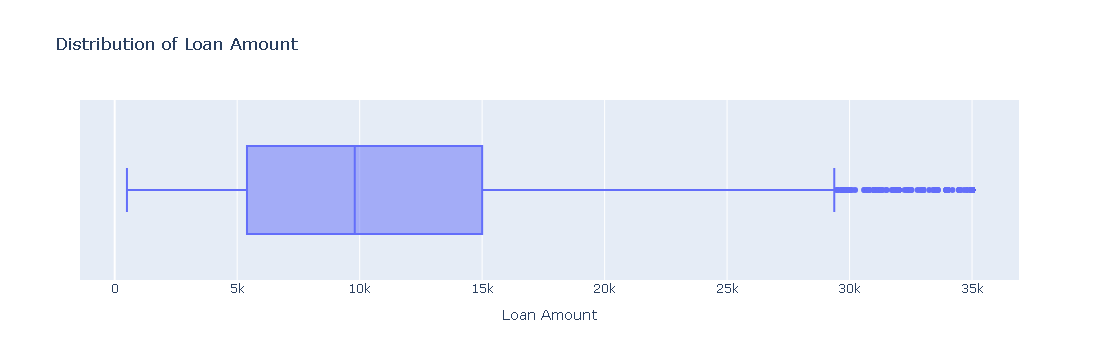

In [77]:
## loan_amnt -> checking for outliers
## We are using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(df1,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()
## Upper fence is 29.175k/29175 whereas max is 35k/35000 and is not much more then upper fence.
## No outliers , so no change on this

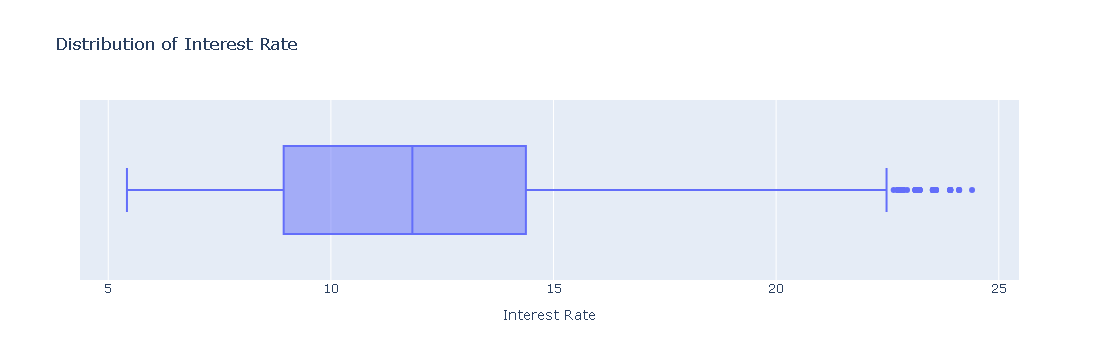

In [75]:
## int_rate --> checking for outliers
## We are using plotly for interactive interaction and value retrival from chart for upper fence
px.box(df1,x='int_rate',width=750,height=350,title='Distribution of Interest Rate',labels={'int_rate':'Interest Rate'}).show()
## Upper fence is 22.64 whereas max is 24.4 which is not much higher than upper fence
## No outliers , so no change on this

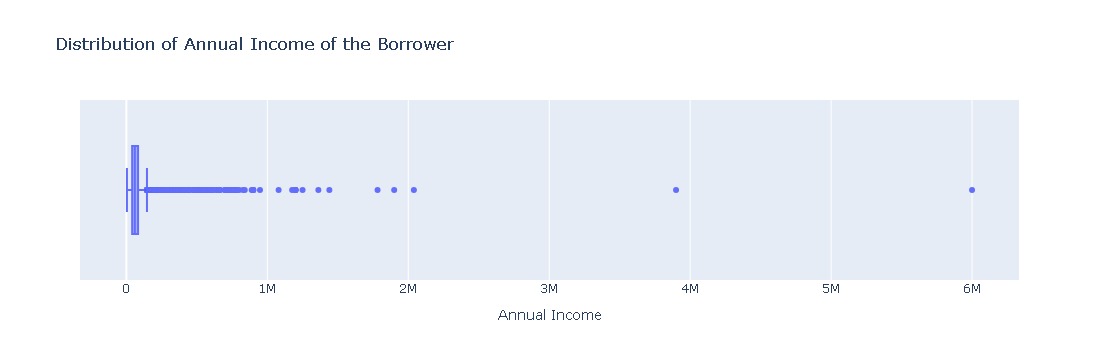

In [46]:
## annual_inc --> checking for outliers
## We are using plotly for interactive interaction and value retrival from chart for upper fence
px.box(df1,x='annual_inc',width=750,height=350,title='Distribution of Annual Income of the Borrower',labels={'annual_inc':'Annual Income'}).show()
## Upper fence turns out to be 146k whereas max is 6M which is much higher than upper fence, thus we will remove the outliers in column annual_inc.

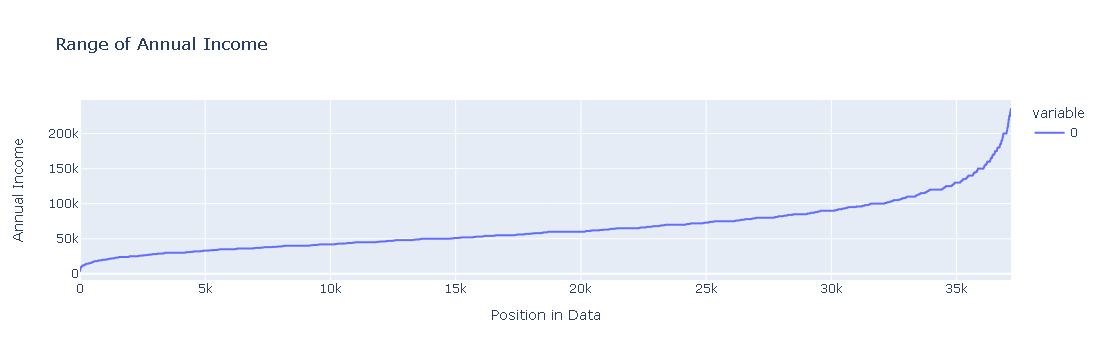

In [79]:
#Identifying the quantile to be removed from the trending values of annual_inc
px.line(sorted(df1.annual_inc),width=750,height=350,title='Range of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

In [48]:
## We will be Removing outliers in annual_inc above 99th percentile
df1 = df1[df1.annual_inc<=np.percentile(df1.annual_inc,99)]

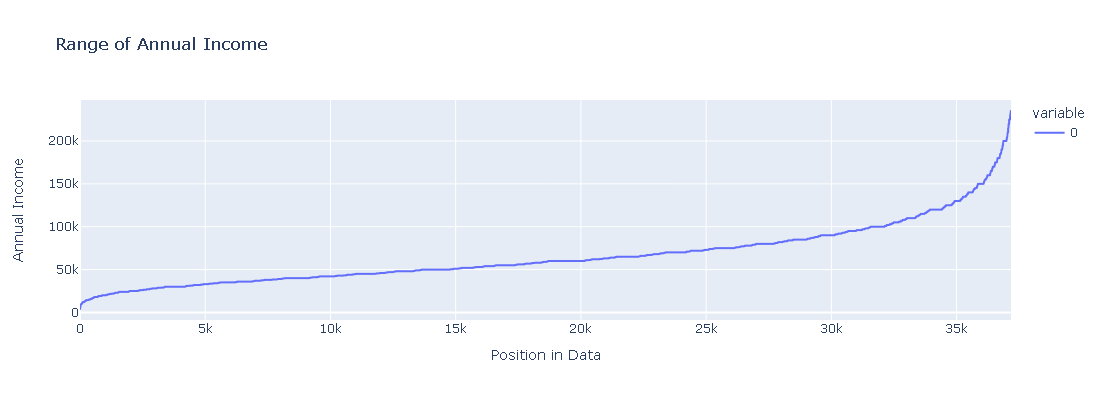

In [71]:
## checking range of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(df1.annual_inc),width=700,height=400,title='Range of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

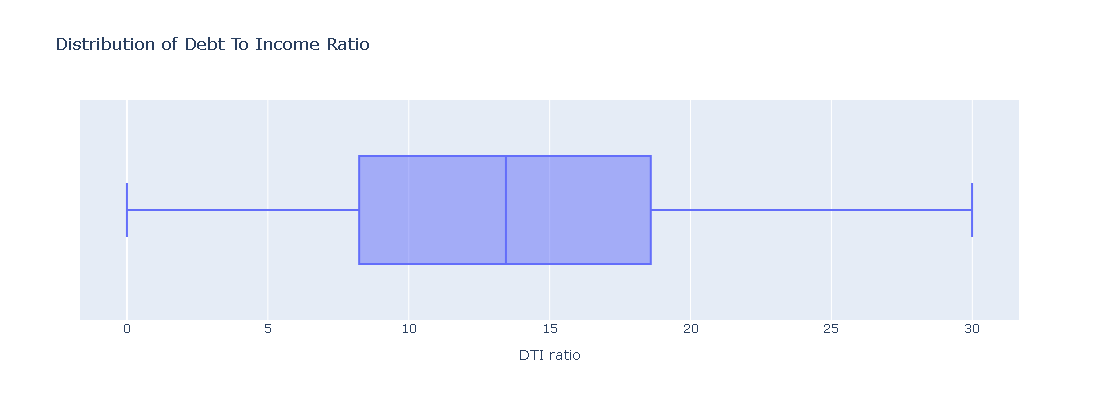

In [50]:
## dti --> checking for outliers
## We are using plotly for interactive interaction and value retrival from chart for upper fence
px.box(df1,x='dti',width=700,height=400,title='Distribution of Debt To Income Ratio',labels={'dti':'DTI ratio'}).show()
## No outliers in dti ,so no change on this

We have cleaned and removed outliers in the data, it is ready for the analysis

## Step 4 --> Analysis - Univariate, Segmented Univariate and Bivariate Analysis

### Univariate Analysis

loan_status
Fully Paid     85.580932
Charged Off    14.419068
Name: count, dtype: float64


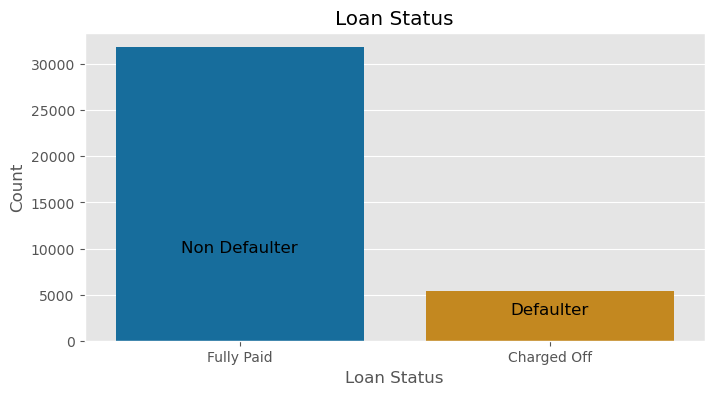

In [87]:
# Loan status 
print(df1.loan_status.value_counts()*100/df1.loan_status.count())
plt.figure(figsize=(8,4))
ax = sns.countplot(x='loan_status', data=df1)
ax.annotate('Non Defaulter',xy=(0.25,0.3),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.annotate('Defaulter',xy=(0.75,0.1),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

Observation: Defaulter's loans are lower in numbers compared to Non Defaulters(Fully Paid)

count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


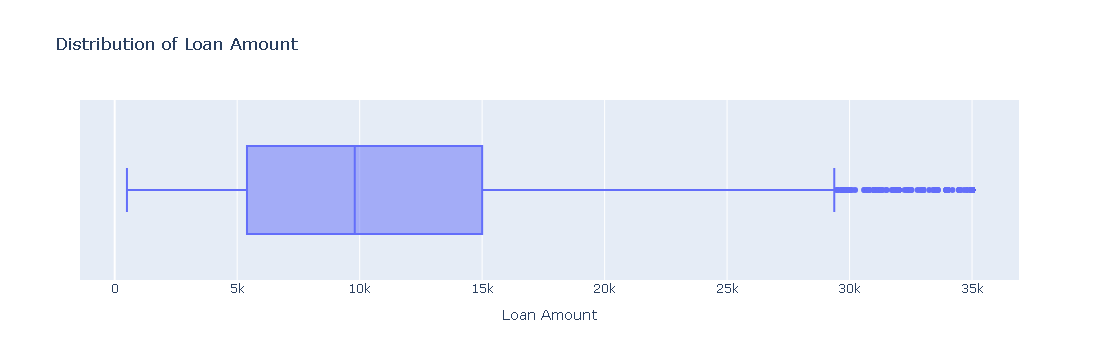

In [52]:
# Loan Amount
print(df1.loan_amnt.describe())
#Plotting histogram of loan amount
px.box(df1,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

Observation :  Loan amount has a range of loans from 500 to 35k with a mean of 9.8k

term
36    75.37729
60    24.62271
Name: count, dtype: float64


<Figure size 1000x500 with 0 Axes>

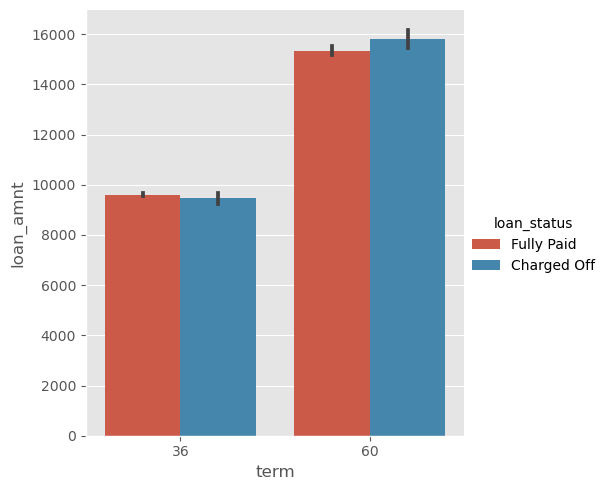

In [53]:
# Term of loan 
print(df1.term.value_counts()*100/df1.term.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
#ax=sns.countplot(df1.term)
sns.catplot(x ='term', y='loan_amnt', data=df1 ,hue='loan_status', kind='bar')
#ax.set_title('Count of loan taken for given Term')
#ax.set_xlabel('Term duration in months')
#ax.set_ylabel('Count')
plt.show()



**Observation:**  The loans in 60 month term mostly consist of grade B, C and D loans whereas The loans in 36 month term majorly consist of grade A and B loans

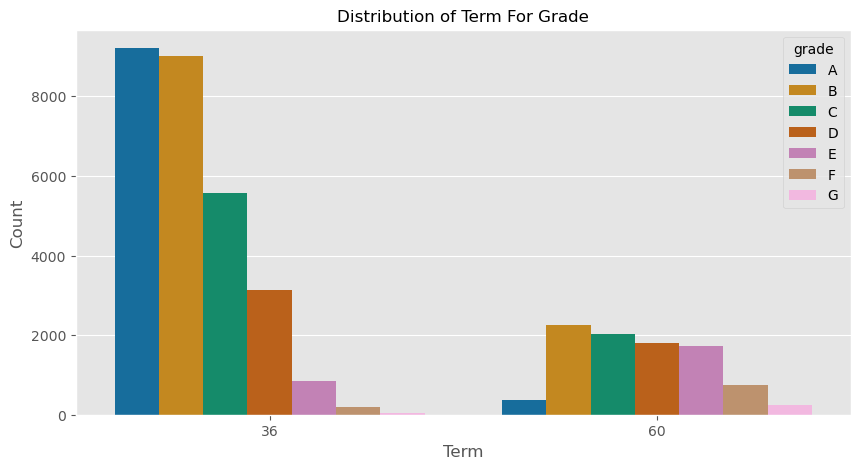

In [146]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

Observation: More than half of the loan taken has term of 36 months compared to 60 months.

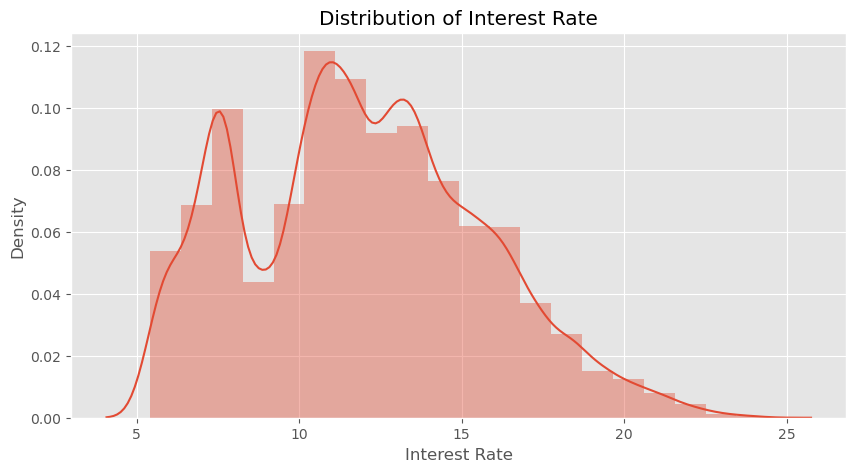

In [54]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(df1.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

**Obesrvation**: Interest rate is more crowded between 5-10 and 10-15 along with a drop near 10

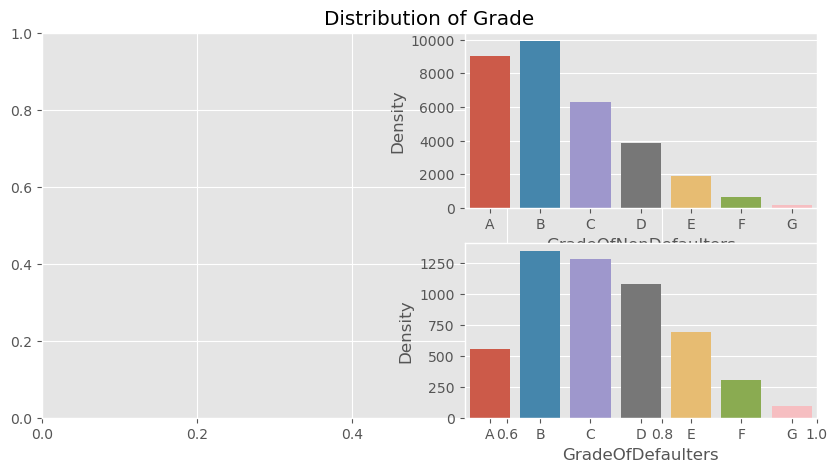

In [56]:
# Distribution of Grade
plt.figure(figsize = (10,5))
plt.title('Distribution of Grade')
plt.subplot(222)
sns.countplot(x='grade', data=df1[df1.loan_status=='Fully Paid'], order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xlabel('GradeOfNonDefaulters')
plt.ylabel('Density')
plt.subplot(224)
sns.countplot(x='grade', data=df1[df1.loan_status=='Charged Off'],order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xlabel('GradeOfDefaulters')
plt.ylabel('Density')
plt.show()

Observation -> Lot of loans are in Grade A and Grade B , meaning loans are approved more for higher grades

### Segmented Univariate Analysis

<Axes: xlabel='issue_year', ylabel='count'>

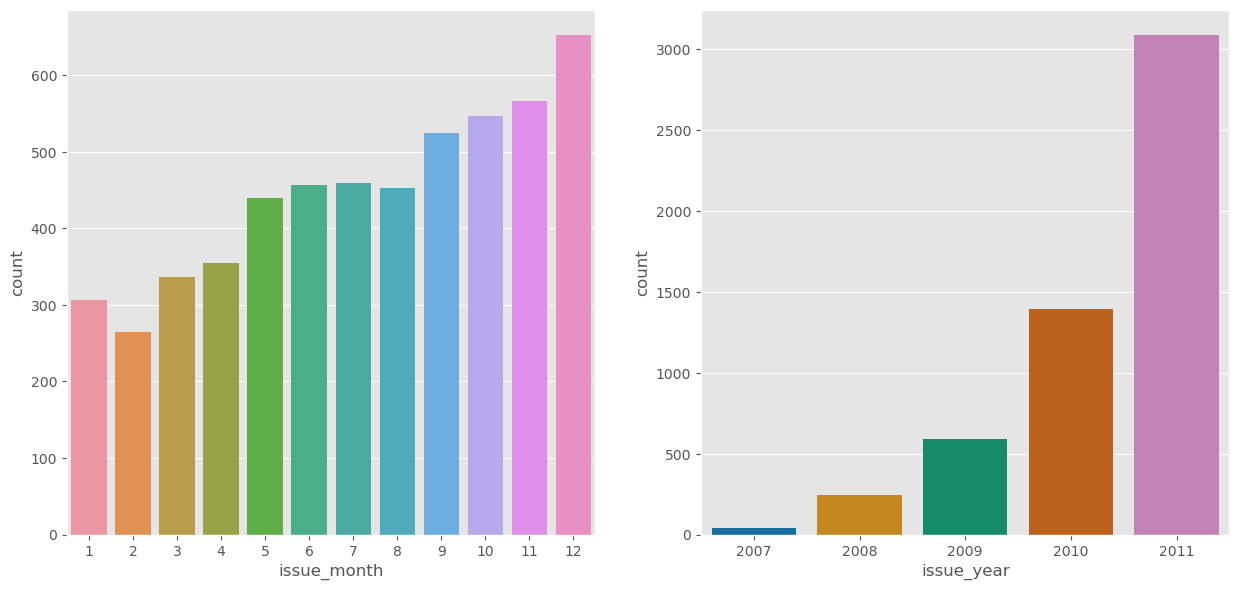

In [309]:
#Loan Status outlook with derived columns of issue_month and issue_year
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=df1[df1['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=df1[df1['loan_status']=='Charged Off'])

Observation: High number of loans are issued in 12th motnhs and year 2011

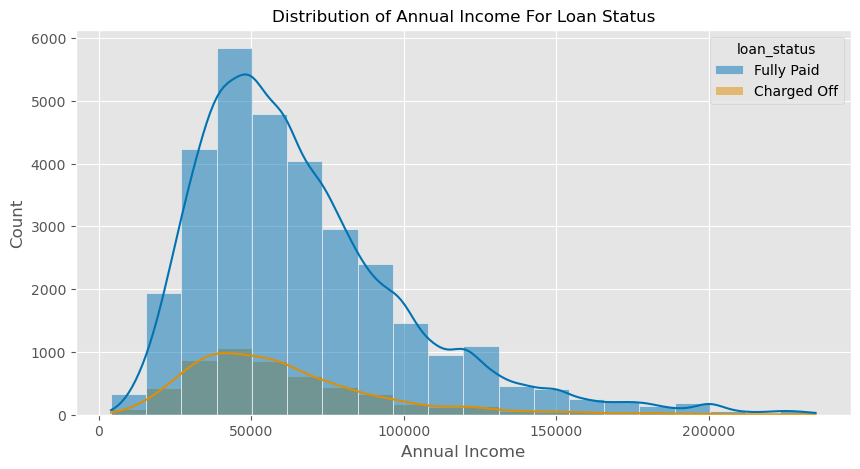

In [59]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=df1,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

 Observation: Borrowers below 50k have high almost half of the defaulters , this can be a risk factor

<Figure size 1200x800 with 0 Axes>

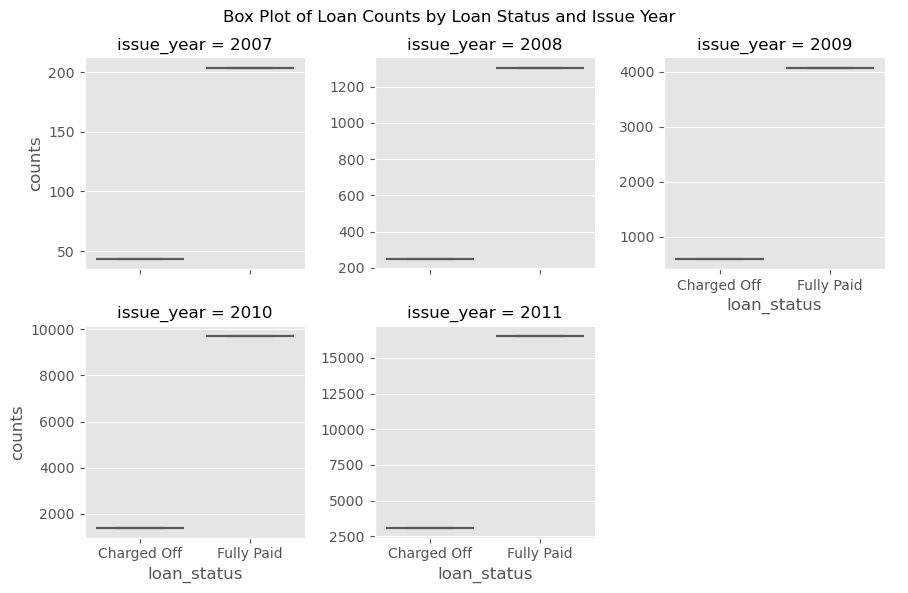

In [236]:
# Distribution of loan_status based on issue_year
counts = df1.groupby(['loan_status', 'issue_year']).size().reset_index(name='counts')
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(df, col='issue_year', col_wrap=3, sharey=False)
g.map(sns.boxplot, 'loan_status', 'counts', palette='Set2')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Box Plot of Loan Counts by Loan Status and Issue Year')
plt.show()

Observation: Volume of loans has vastly increased with each year, also indicates approvals have increased 

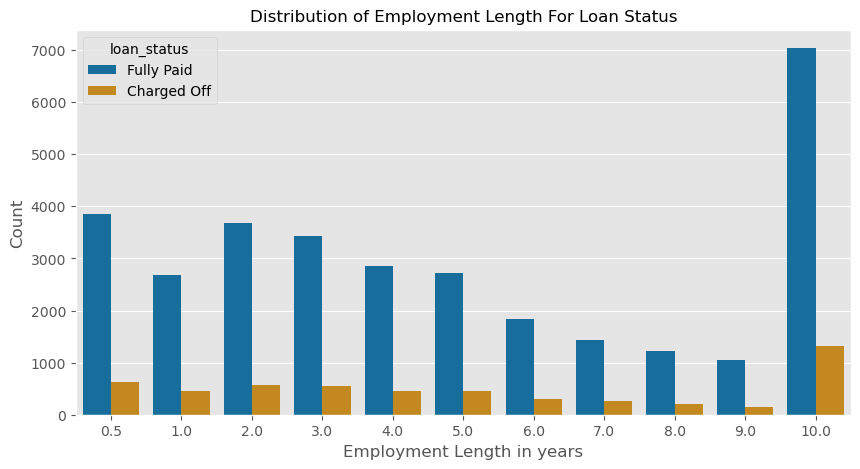

In [134]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

Observation : Borrowers with 10+ years have taken more loans and high number of fully paid, defaulters are also comparatively more

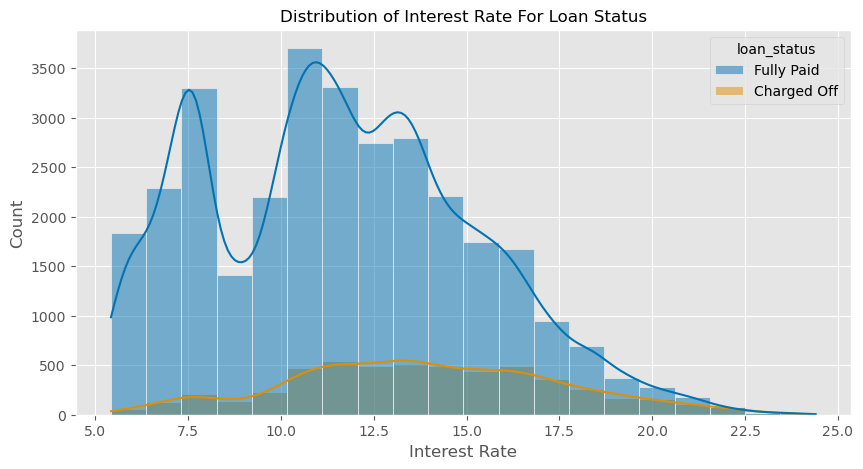

In [136]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=df1,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

Observation: The interest rate has increased till 16% and then dropped from 17% for defaulters. For Fully paid , there is drop near 10%

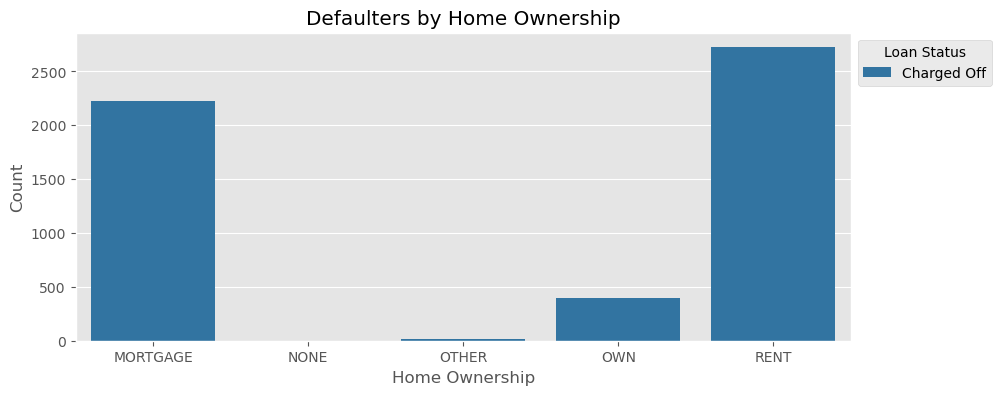

In [254]:
# Defaulters by Home Ownership 
plt.figure(figsize=(10, 4))
#sns.countplot(data=df, x='home_ownership', hue='loan_status', palette='Set2')
#sns.countplot(data=df[df['loan_status'] == 'Charged Off'], x='home_ownership', hue='loan_status', palette='Set2')
color_dict = {
    'Fully Paid': '#1f77b4',
    'Charged Off': '#1f77b4',
    'Default': '#2ca02c'
}

sns.countplot(data=df1[df1['loan_status'] == 'Charged Off'], x='home_ownership', hue='loan_status', palette= color_dict)
#df[df['loan_status'] == 'Charged Off']
plt.legend(title='Loan Status', bbox_to_anchor=(1, 1))  # Move legend outside
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Defaulters by Home Ownership')
plt.show()

Observation: Defaulters with RENT and MORTGAGE Home Owners are most likely to default than with OWN homes

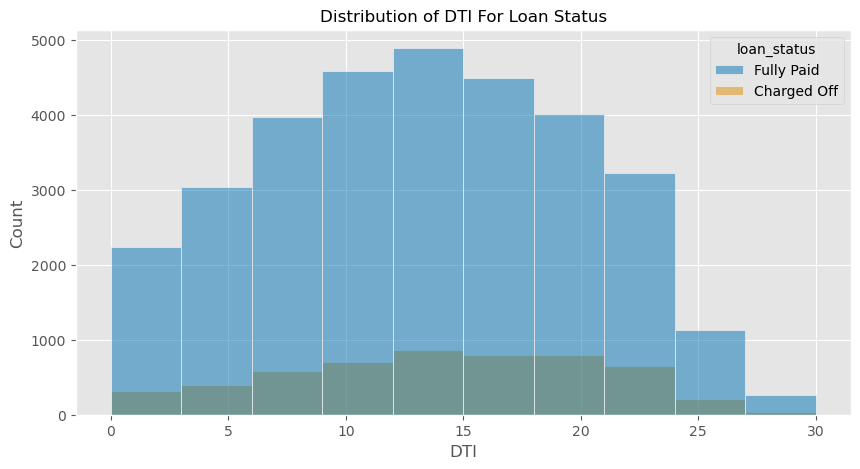

In [144]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=df1,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

Observation: The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting

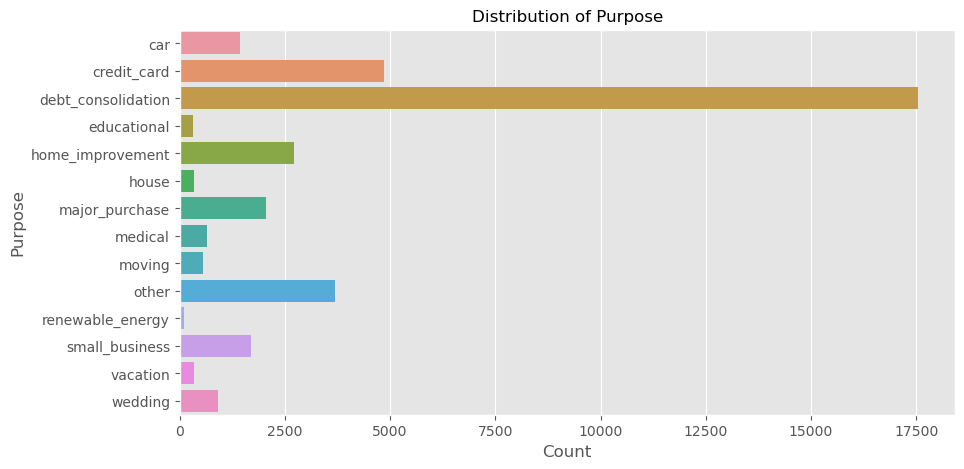

In [304]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(y=df1.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

Observation: A high percentage of loans are taken for the purpose of debt consolidation followed by credit card

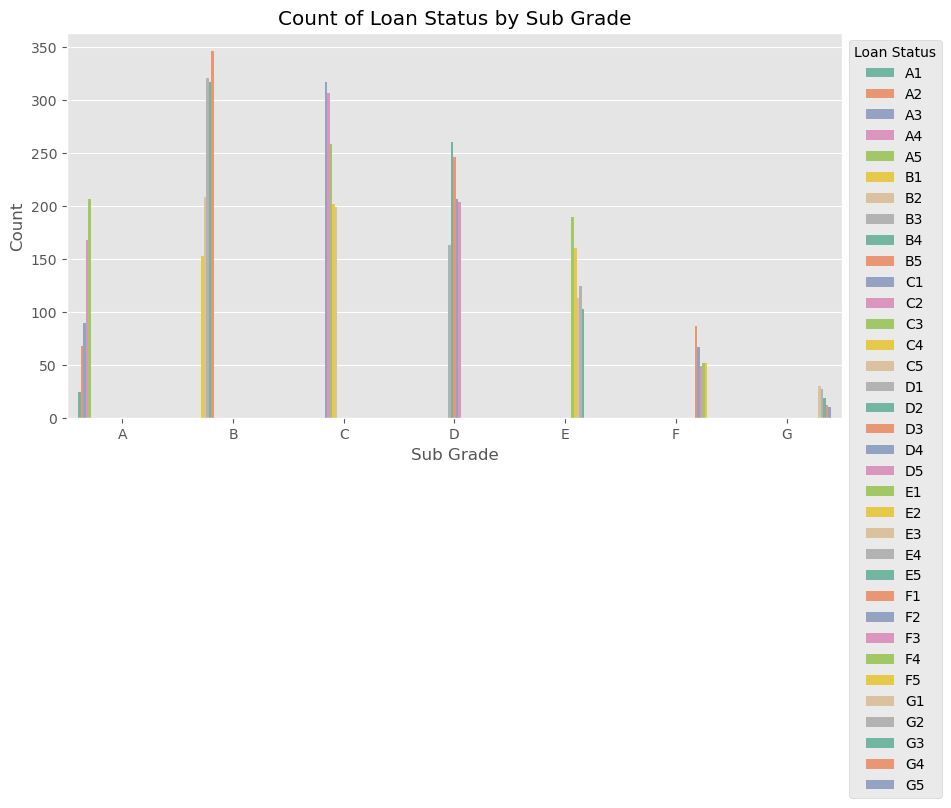

In [349]:
##Count of Loan Status by Sub Grade
#fig, ax = plt.subplots(figsize=(20,6))
#sns.set_palette('colorblind')
#sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df1[df1.loan_status == 'Charged Off'])
#sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,data = df1[df1.loan_status == 'Charged Off'])
plt.figure(figsize=(10, 5))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df1[df1.loan_status == 'Charged Off'], palette='Set2')
#sns.countplot(data=df, x='home_ownership', hue='loan_status', palette='Set2')
plt.legend(title='Loan Status', bbox_to_anchor=(1, 1))  # Move legend outside
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.title('Count of Loan Status by Sub Grade')
plt.show()

Observation : Compared to Sub grades of A , more numbers of defaulters are in Subrades of B & C, this is a risk factor

### Bivariate Analysis

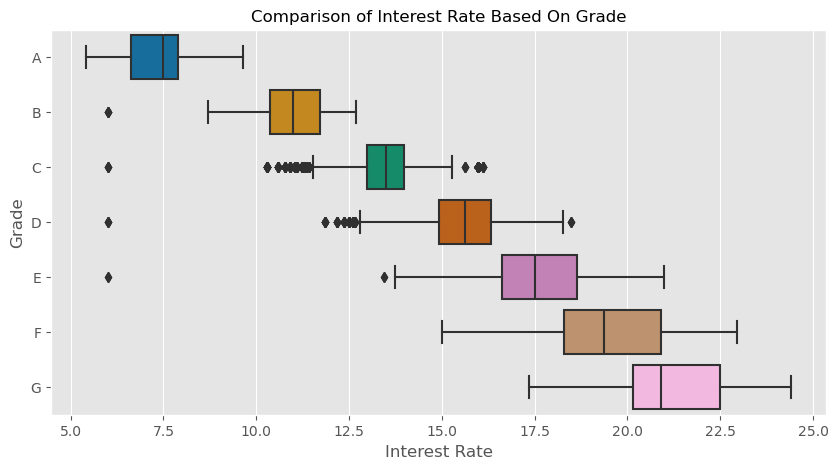

In [138]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=df1,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

Observation: The rate of interest is inversely proportional to Grades, highesr the grade , lower is the interest rate. Grade is a risk factor

<Figure size 1500x600 with 0 Axes>

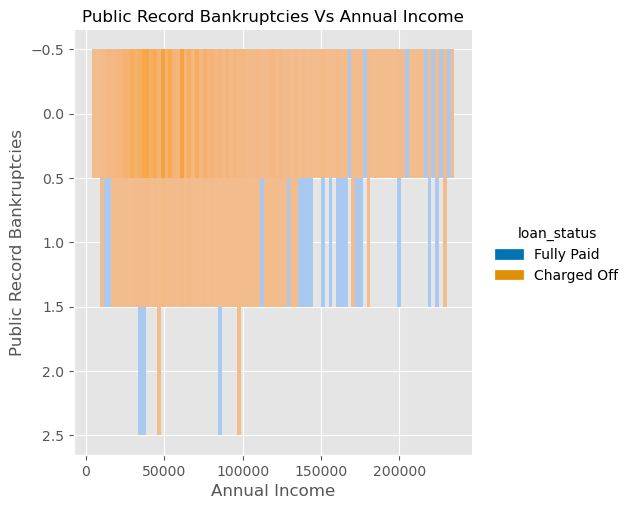

In [290]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(15,6))
sns.displot(y=df1.pub_rec_bankruptcies.astype('category'),x=df1.annual_inc,hue=df1.loan_status)
#sns.boxplot(data=df1,x='pub_rec_bankruptcies',y='annual_inc')
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

Observation: Most of the borrowers dont have bankruptcy records and are safe choice for loan approval

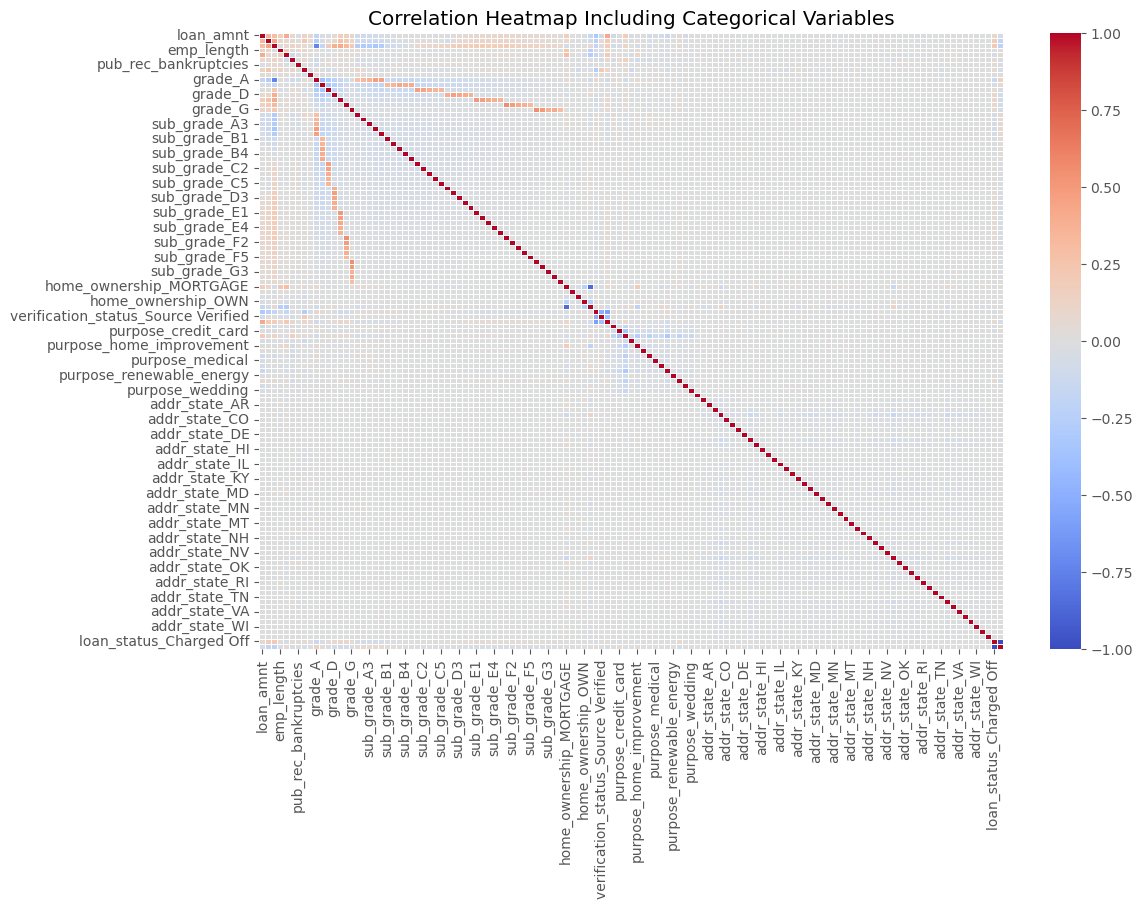

In [383]:
# Heatmap of correlation between variables

# Convert categorical columns to dummy variables
df1_encoded = pd.get_dummies(df1, columns=['grade', 'sub_grade', 'home_ownership', 
                                           'verification_status', 'purpose', 'addr_state', 'loan_status'])

# Drop 'id' column if it is not needed for correlation analysis
df1_encoded = df1_encoded.drop(columns=['id'])

# Calculate the correlation matrix
corr_matrix = df1_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap Including Categorical Variables')
plt.show()

## Step 5 --> Final Thoughts

## Observations
### Univariate Analysis
 - Defaulter's loans are lower in numbers compared to Non-Defaulters (Fully Paid)
 - Loan amount has a range of loans from 500 to 35k with a mean of 9.8k
 - The loans in 60 months term mostly consist of grade B, C and D loans whereas the loans in 36 months term majorly consist of grade A and B loans
 - More than half of the loan taken has term of 36 months compared to 60 months
 - Interest rate is more crowded between 5-10% and 10-15% along with a drop near 10%
 - Lot of loans are in Grade A and Grade B, meaning more loans are approved more for higher grades
   
### Segmented Univariate Analysis
 - High number of loans are issued in 12th months and year 2011
 - Borrowers below 50k are almost half of the defaulters, this can be a risk factor
 - Volume of loans has vastly increased with each year, also indicates approvals have increased
 - Borrowers with 10+ years have taken more loans and high number of them have fully paid, defaulters are also comparatively more
 - The interest rate has increased till 16% and then dropped from 17% for defaulters. For Fully paid, there is drop near 10%
 - Defaulters with RENT and MORTGAGE Home Owners are most likely to default than wit OWN homes
 - The Loan Status varies with DTI ratio; we can see that the loans in DTI of 10-15% have higher number of defaulted loan,higher the       dti more chance of defaulting.
 - A high percentage of loans are taken for the purpose of debt consolidation followed by credit card
 - Compared to Sub grades of A, more numbers of defaulters are in Sub Grade of B & C, this is a risk factor
   
### Bivariate Analysis
 - The rate of interest is inversely proportional to Grades meaning higher the grade, lower is the interest rate. Grade is a risk          factor.
 - The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default
 - The borrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

## Factors influencing loan defaulters
    1. Loans against Debt Consolidation and Credit Card
    2. Debt to Income factor 
    3. Grades
    4. Annual income
    5. Public Record Bankruptcies
    6. Home Ownership
    7. Higher Interest rates
    8. Length ngth of the Employment

## Recommendations
    1. Borrowers having loans against debt consolidation and Credit Cards are more likely to get into debt trap with high interest      
       rates complicating loan repayment and are likely to default
    2. Borrowers with very high Debt to Income ratio are likely to default, additional due diligence needs to be carried out
    3. Borrowers with highest grade A are safer compared to lower grades resulting in high risk and likely default loans
    4. Borrowers having annual income less than ~50000 are likely to default more posing risk of repayment and likely to default
    5. Borrowers with Public Recorded Bankruptcies pose higher risk for loan repayment and likely to default
    6. Borrowers with Rented and Mortgaged Home Ownership carry more disk, hence likely default loans
    7. Borrowers with high interest rates pose high risk to default
    8. Even though borrowers with working experience of 10+ years are likely to fully pay,they also pose risk to default loans given the fact borrowers with 10+ years expereience are high consumer of loans. This needs additional due deligence from the bank.
       